# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [125]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import random as random


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

api_key = weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
api_key 
# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
json = []

url = []
for x in cities:
    
    requests.get(query_url + x)
    response = requests.get(query_url + x).json()
    json.append(response)
    url.append(query_url + x)
    print(f'Requesting Json for {x}')
    print(requests.get(query_url + x))
    
print(len(json))  
    


Requesting Json for barentsburg
<Response [404]>
Requesting Json for saskylakh
<Response [200]>
Requesting Json for rosario
<Response [200]>
Requesting Json for garni
<Response [200]>
Requesting Json for vaini
<Response [200]>
Requesting Json for ostrovnoy
<Response [200]>
Requesting Json for ushuaia
<Response [200]>
Requesting Json for huescar
<Response [200]>
Requesting Json for amderma
<Response [404]>
Requesting Json for santa cruz de la palma
<Response [200]>
Requesting Json for chavakkad
<Response [200]>
Requesting Json for port alfred
<Response [200]>
Requesting Json for chagda
<Response [404]>
Requesting Json for pueblo
<Response [200]>
Requesting Json for albany
<Response [200]>
Requesting Json for rikitea
<Response [200]>
Requesting Json for bushehr
<Response [200]>
Requesting Json for hobart
<Response [200]>
Requesting Json for luganville
<Response [200]>
Requesting Json for erenhot
<Response [200]>
Requesting Json for gizo
<Response [200]>
Requesting Json for faanui
<Respon

Requesting Json for shahreza
<Response [200]>
Requesting Json for tsihombe
<Response [404]>
Requesting Json for bosaso
<Response [200]>
Requesting Json for ribeira grande
<Response [200]>
Requesting Json for quatre cocos
<Response [200]>
Requesting Json for nesna
<Response [200]>
Requesting Json for kuytun
<Response [200]>
Requesting Json for kodiak
<Response [200]>
Requesting Json for yar-sale
<Response [200]>
Requesting Json for temnikov
<Response [200]>
Requesting Json for trincomalee
<Response [200]>
Requesting Json for koumac
<Response [200]>
Requesting Json for harare
<Response [200]>
Requesting Json for te anau
<Response [200]>
Requesting Json for saint anthony
<Response [200]>
Requesting Json for oranjestad
<Response [200]>
Requesting Json for pacific grove
<Response [200]>
Requesting Json for half moon bay
<Response [200]>
Requesting Json for narrabri
<Response [200]>
Requesting Json for ghanzi
<Response [200]>
Requesting Json for rawson
<Response [200]>
Requesting Json for ba

Requesting Json for chokurdakh
<Response [200]>
Requesting Json for alekseyevsk
<Response [200]>
Requesting Json for pangnirtung
<Response [200]>
Requesting Json for turukhansk
<Response [200]>
Requesting Json for port elizabeth
<Response [200]>
Requesting Json for grindavik
<Response [200]>
Requesting Json for grand gaube
<Response [200]>
Requesting Json for san patricio
<Response [200]>
Requesting Json for henderson
<Response [200]>
Requesting Json for vohibinany
<Response [200]>
Requesting Json for taburi
<Response [404]>
Requesting Json for pisco
<Response [200]>
Requesting Json for nalut
<Response [200]>
Requesting Json for linxia
<Response [200]>
Requesting Json for severo-yeniseyskiy
<Response [200]>
Requesting Json for meyungs
<Response [404]>
Requesting Json for bodden town
<Response [200]>
Requesting Json for monte alegre de sergipe
<Response [200]>
Requesting Json for sur
<Response [200]>
Requesting Json for verkhnyaya inta
<Response [200]>
Requesting Json for seoul
<Respons

Requesting Json for balestrand
<Response [200]>
Requesting Json for kuryk
<Response [200]>
Requesting Json for sibolga
<Response [200]>
Requesting Json for felsozsolca
<Response [200]>
Requesting Json for kiruna
<Response [200]>
Requesting Json for uniao da victoria
<Response [404]>
Requesting Json for kirkwood
<Response [200]>
Requesting Json for marcona
<Response [404]>
Requesting Json for bratsk
<Response [200]>
Requesting Json for nepa nagar
<Response [200]>
Requesting Json for tawkar
<Response [404]>
Requesting Json for kanniyakumari
<Response [200]>
Requesting Json for ust-ishim
<Response [200]>
Requesting Json for adrar
<Response [200]>
Requesting Json for boden
<Response [200]>
Requesting Json for volchansk
<Response [200]>
Requesting Json for svetlogorsk
<Response [200]>
Requesting Json for nome
<Response [200]>
Requesting Json for morondava
<Response [200]>
Requesting Json for bulungu
<Response [200]>
Requesting Json for havre-saint-pierre
<Response [200]>
Requesting Json for

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [41]:
city_data = {}
city_data["City"] = []
city_data["Cloudiness"] = []
city_data["Country"] = []
city_data["Date"] = []
city_data["Humidity"] = []
city_data["Lat"] = []
city_data["Lng"] = []
city_data["Max Temp"] = []
city_data["Wind Speed"] = []



#     try:
#         clouds.append(response['clouds']['all'])
#         clouds.append(response['sys']['AU'])
#     except KeyError:
#         clouds.append(0)



# city_data=pd.DataFrame(city_data)
# city_data.head()

# city_data

for x in range(len(json)):
    try:
        city_data["City"].append(json[x]['name'])
    except KeyError:
            city_data["City"].append(cities[x] + ' - ' + json[x]['message'])
    try:
        city_data["Cloudiness"].append(json[x]['clouds']['all'])
    except KeyError:
            city_data["Cloudiness"].append(0)            
    try:
        city_data["Country"].append(json[x]['sys']['country'])
    except KeyError:
            city_data["Country"].append(json[x]['message'])
    try:
        city_data["Date"].append(json[x]['dt'])
    except KeyError:
           city_data["Date"].append(0)
    try:
        city_data["Humidity"].append(json[x]['main']['humidity'])
    except KeyError:
           city_data["Humidity"].append(0)       
    try:
        city_data["Lat"].append(json[x]['coord']['lat'])
    except KeyError:
           city_data["Lat"].append(0)
    try:
        city_data["Lng"].append(json[x]['coord']['lon'])
    except KeyError:
           city_data["Lng"].append(0)
    try:
        city_data["Max Temp"].append(json[x]['main']['temp'])
    except KeyError:
           city_data["Max Temp"].append(0)
    try: 
        city_data["Wind Speed"].append(json[x]['wind']['speed'])
    except KeyError:
           city_data["Wind Speed"].append(0)                        
                    
            

city_data = pd.DataFrame(city_data)


city_fail = city_data[city_data['Country'] == "city not found"]

city_data = city_data[city_data['Country'] != "city not found"]
 
if len(city_data) > 500:
    print(f'Proceed: {len(city_data)} cities retrieved')
else: 
    print(f'Re-request Jsons: {len(city_data)} cities retrieved. {len(city_fail)} requests failed.')


Proceed: 566 cities retrieved


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

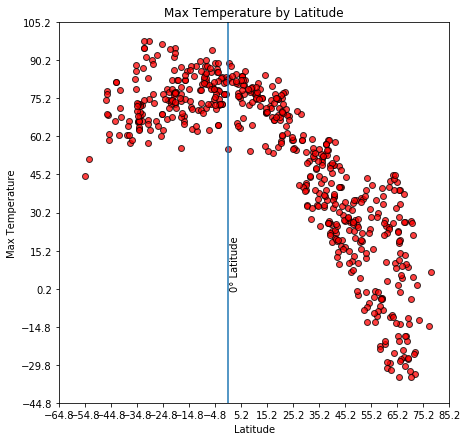

In [82]:
lat_total = city_data['Lat'].to_list()

temp_total = city_data['Max Temp'].tolist()

plt.scatter(lat_total,temp_total, marker="o", facecolors="red", edgecolors="black",
           alpha=0.75)

plt.title("Max Temperature by Latitude")

plt.xlabel("Latitude")

plt.ylabel("Max Temperature")

plt.xticks(np.arange(min(lat_total)-10, max(lat_total)+10, step=10))

plt.yticks(np.arange(min(temp_total)-10, max(temp_total)+10, step=15))

plt.axvline(x = 0)

fig = plt.gcf()
fig.set_size_inches(7, 7)

plt.text(0.8,0,'0° Latitude',rotation=90)

plt.show()




In [ ]:
#The line of best fit in the above scatter plot shows strong negative correlation between locations with latitudes that are nearer to 0 and higher temperatures. 
#The correlation skews sharply to very low tempatures as locations with positive latitudes increase further from zero.
#Outliers in the correlation occur in latitudes ranging from -45 and -24 degrees, where the temperatures seem to show a positive correlation between lower latitudes and lower temperatures.


#### Latitude vs. Humidity Plot

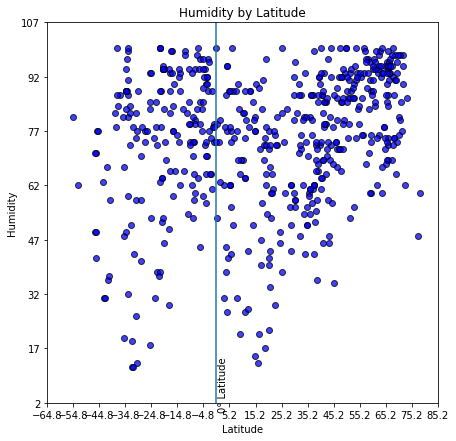

In [85]:
lat_total = city_data['Lat'].to_list()

humid_total = city_data['Humidity'].tolist()

plt.scatter(lat_total,humid_total, marker="o", facecolors="blue", edgecolors="black",
           alpha=0.75)

plt.title("Humidity by Latitude")

plt.xlabel("Latitude")

plt.ylabel("Humidity")

plt.xticks(np.arange(min(lat_total)-10, max(lat_total)+10, step=10))

plt.yticks(np.arange(min(humid_total)-10, max(humid_total)+10, step=15))

plt.axvline(x = 0)

fig = plt.gcf()
fig.set_size_inches(7, 7)

plt.text(0.8,0,'0° Latitude',rotation=90)

plt.show()

In [ ]:
#The above scatter plot shows virtually no correlation between humidity and latitude. 
#There are outliers in the scatterplot across the range of latitudes, for both positive and negative latitudes.
#There is a cluster of possible correlation between latitudes ranging from 60 to 75 degress may imply the beginning of a line of best fit; 
#however, with the very small sample size and lack of longitude as a cross reference, it is difficult to determine whether this possible correlation occurs
#only by latitude, or if it is more depedant on another factor than latitude (for instance sea level, relative distance from a body of water).

#### Latitude vs. Cloudiness Plot

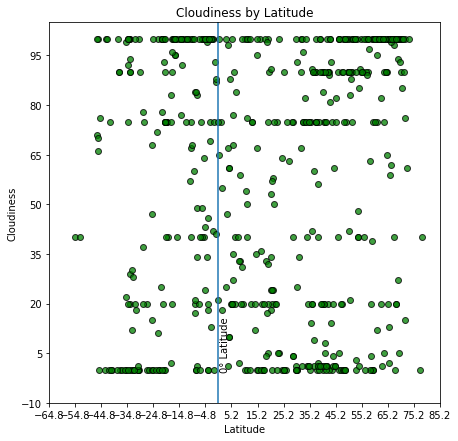

In [86]:
lat_total = city_data['Lat'].to_list()

cloud_total = city_data['Cloudiness'].tolist()

plt.scatter(lat_total,cloud_total, marker="o", facecolors="green", edgecolors="black",
           alpha=0.75)

plt.title("Cloudiness by Latitude")

plt.xlabel("Latitude")

plt.ylabel("Cloudiness")

plt.xticks(np.arange(min(lat_total)-10, max(lat_total)+10, step=10))

plt.yticks(np.arange(min(cloud_total)-10, max(cloud_total)+10, step=15))

plt.axvline(x = 0)

fig = plt.gcf()
fig.set_size_inches(7, 7)

plt.text(0.8,0,'0° Latitude',rotation=90)

plt.show()

In [ ]:
#The above scatter plot shows no correlation bewtween latitude and cloudiness.
#There are multiple data points throughout all latitude ranges, which prevent the drawing of an ascending or descending line
#of best fit. The scatter plot seems to imply the need for an additional axis as reference (i.e. longitude), as patterns do seem
#to be forming, but not in a manner that suggests a consistent linear slope between the x and y axes. 

#### Latitude vs. Wind Speed Plot

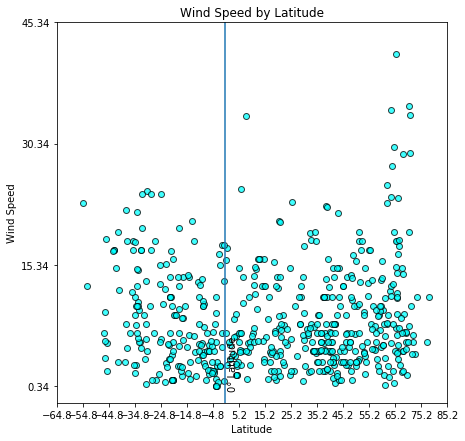

In [88]:
lat_total = city_data['Lat'].to_list()

wind_total = city_data['Wind Speed'].tolist()

plt.scatter(lat_total,wind_total, marker="o", facecolors="aqua", edgecolors="black",
           alpha=0.75)

plt.title("Wind Speed by Latitude")

plt.xlabel("Latitude")

plt.ylabel("Wind Speed")

plt.xticks(np.arange(min(lat_total)-10, max(lat_total)+10, step=10))

plt.yticks(np.arange(min(wind_total), max(wind_total)+10, step=15))

plt.axvline(x = 0)

fig = plt.gcf()
fig.set_size_inches(7, 7)

plt.text(0.8,0,'0° Latitude',rotation=90)

plt.show()

In [ ]:
#The above scatter plot shows a very weak possible correlation between windspeed and latitude. 
#The scatter plot is better interpreted as no correlation between latitude and wind speed.
#A line of best fit may possibly be drawn which may show the hint of a correlation between higher wind speeds and more positive latitudes.
#The plot would again benefit from a larger sample size. 

## Linear Regression

In [138]:
# OPTIONAL: Create a function to create Linear Regression plots
#y=a+bx y = dependant variable, b= slope, x = independant variable, a=y-intercept.
#y-intercept = y-bx=a

# min_x = min(lat_total)

# max_x = max(lat_total)

# mean_x = float(pd.DataFrame(lat_total).mean())

# min_y = min(temp_total)

# max_y = max(temp_total)

# mean_y = float(pd.DataFrame(temp_total).mean())

# slope = (max_y-min_y)/(max_x-max_y)

# y_int = mean_y-(slope*0)

# y_coord = y_int+(slope*mean_x)

# plt.plot(mean_x,y_coord)

# slope

x_mean = float(pd.DataFrame(lat_total).mean())

x_lowest = [] 
x_low = [] 
x_high = [] 
x_max = [] 

y_mean = float(pd.DataFrame(temp_total).mean())

y_lowest = [] 
y_low = [] 
y_high = [] 
y_max = [] 

for x in lat_total:
    if x <= x_mean *.25:
        x_lowest.append(x)
    elif x <= x_mean *.5:
        x_low.append(x)
    elif x <= x_mean*.75:
        x_high.append(x)
    else:
        x_max.append(x)   
        
for x in temp_total:
    if x <= y_mean *.25:
        y_lowest.append(x)
    elif x <= y_mean *.5:
        y_low.append(x)
    elif x <= y_mean*.75:
        y_high.append(x)
    else:
        y_max.append(x)         

x_coord = [random.choice(x_lowest),random.choice(x_low),random.choice(x_high),random.choice(x_max)]

y_coord = [random.choice(y_lowest),random.choice(y_low),random.choice(y_high),random.choice(y_max)]

print(x_coord)

print(y_coord)

sum_x = sum(x_coord)

sum_y = sum(y_coord)












[-54.8, 5.21, 10.99, 42.6]
[-3.55, 18.27, 35.13, 77.09]


In [4]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression